In [3]:
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import Imputer
import xgboost
from xgboost import XGBClassifier
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as sc
import scikitplot as skplt

%matplotlib inline

# Data Loading

In [6]:
data = pd.read_csv("DS_MiniProject_ANON.csv")
data1=data.copy()

# Exploratory Data Analysis

In [7]:
data.head()

,DATE_FOR,RTD_ST_CD,CustomerSegment,Tenure,Age,MART_STATUS,GENDER,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,...,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
0,5/19/2014,ST_S0,1,16.175222,78.403833,MS_S0,F,0.0,0.0,1.0,...,2,0,3,0,0,0,0,0,0,0
1,5/17/2014,ST_S0,1,15.931554,70.989733,MS_S1,F,0.0,6.0,0.0,...,0,3,3,0,0,0,0,0,0,0
2,5/15/2014,ST_S0,1,15.937029,87.578371,MS_S2,M,0.0,0.0,10.0,...,0,0,6,0,0,0,0,0,0,0
3,5/16/2014,ST_S1,1,15.934292,68.438056,MS_S2,M,0.0,0.0,1.0,...,0,0,0,0,0,0,0,0,1,0
4,5/20/2014,ST_S0,1,15.501711,80.514716,MS_S0,F,0.0,0.0,1.0,...,0,0,1,0,0,0,0,0,0,0


## Dataset dimension

In [8]:
print("The number of rows in data :",data.shape[0])
print("The number of columns in data :",data.shape[1])

The number of rows in data : 130086
The number of columns in data : 29


## Remove duplicate rows from the dataset

In [9]:
data.drop_duplicates(inplace=True)
data1.drop_duplicates(inplace=True)

## Number of Rows and Column after removing the duplicates

In [10]:
print("The number of rows in data after removing the duplicates :",data.shape[0])
print("The number of columns in data after removing the duplicates :",data.shape[1])

The number of rows in data after removing the duplicates : 129808
The number of columns in data after removing the duplicates : 29


## Datatype of  Columns

In [11]:
data.dtypes

DATE_FOR                  object
RTD_ST_CD                 object
CustomerSegment           object
Tenure                   float64
Age                      float64
MART_STATUS               object
GENDER                    object
CHANNEL1_6M              float64
CHANNEL2_6M              float64
CHANNEL3_6M              float64
CHANNEL4_6M              float64
CHANNEL5_6M              float64
METHOD1_6M               float64
RECENT_PAYMENT           float64
PAYMENTS_6M              float64
CHANNEL1_3M                int64
CHANNEL2_3M                int64
CHANNEL3_3M                int64
CHANNEL4_3M                int64
CHANNEL5_3M                int64
METHOD1_3M                 int64
PAYMENTS_3M                int64
NOT_DI_3M                  int64
NOT_DI_6M                  int64
EVENT1_30_FLAG             int64
EVENT2_90_SUM              int64
LOGINS                     int64
POLICYPURCHASECHANNEL      int64
Call_Flag                  int64
dtype: object

## Which Customer Segment makes most service calls?
## Segment 1 
## It might have some association with response variable


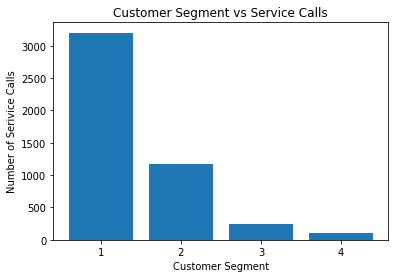

In [163]:

y=list(data.groupby('CustomerSegment')['Call_Flag'].sum().values)
x=[1,2,3,4]
plt.bar(range(1,5),y)
plt.xticks(x)
plt.xlabel("Customer Segment")
plt.ylabel('Number of Serivice Calls')
plt.title('Customer Segment vs Service Calls')
plt.show()


## Checking the missing data

In [63]:
data.isnull().sum()

DATE_FOR                   0
RTD_ST_CD                  0
CustomerSegment            0
Tenure                     0
Age                        0
MART_STATUS                0
GENDER                     0
CHANNEL1_6M              809
CHANNEL2_6M              809
CHANNEL3_6M              809
CHANNEL4_6M              809
CHANNEL5_6M              809
METHOD1_6M               809
RECENT_PAYMENT           809
PAYMENTS_6M              809
CHANNEL1_3M                0
CHANNEL2_3M                0
CHANNEL3_3M                0
CHANNEL4_3M                0
CHANNEL5_3M                0
METHOD1_3M                 0
PAYMENTS_3M                0
NOT_DI_3M                  0
NOT_DI_6M                  0
EVENT1_30_FLAG             0
EVENT2_90_SUM              0
LOGINS                     0
POLICYPURCHASECHANNEL      0
Call_Flag                  0
dtype: int64

## % of missing data in the dataset

In [74]:

for i in range(len(data.isnull().sum())):
    
    if data.isnull().sum()[i]!=0:
        print("The precentage of missing rows in the dataset :",(data.isnull().sum()[i]/data.shape[0])*100,"%",sep="")
        break


The precentage of missing rows in the dataset :0.6232281523480834%


## Checking weather the Target variable (call_flag) is Balanced or Not

In [75]:
print ("The dependent variable is unbalanced having % of (Call_Flag=1) is:",float((data.Call_Flag.sum())/float(data.Call_Flag.shape[0])*100),"%",sep="")


The dependent variable is unbalanced having % of (Call_Flag=1) is:3.639991371872304%


# Handling missing Values
## There are two methods for handling missing values.I will evaluate my model on 2 different datasets

##  A.  There are 809 rows missing in the dataset out of which 39 rows are having call_Flag=1,As the data is already unbalanced I just don't want to remove the missing data


In [76]:
k=Imputer(strategy='most_frequent')
data1.iloc[:,7:15]=k.fit_transform(data1.iloc[:,7:15])


/home/nitinchoudhry24/.local/lib/python3.5/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


## B. Remove the missing Values

In [77]:
#The percentage of the missing data is verly less so i removed it

data.dropna(inplace=True)

# Number of unique values in each Column

In [78]:
for i in data.columns:
    print("There are",len(data[i].unique()),"unique values in the",i,"column",data[i].unique())

There are 8 unique values in the DATE_FOR column ['5/19/2014' '5/17/2014' '5/15/2014' '5/16/2014' '5/20/2014' '5/14/2014'
 '5/13/2014' '5/18/2014']
There are 51 unique values in the RTD_ST_CD column ['ST_S0' 'ST_S1' 'ST_S2' 'ST_S3' 'ST_S4' 'ST_S5' 'ST_S6' 'ST_S7' 'ST_S8'
 'ST_S9' 'ST_S10' 'ST_S11' 'ST_S12' 'ST_S13' 'ST_S14' 'ST_S15' 'ST_S16'
 'ST_S17' 'ST_S18' 'ST_S19' 'ST_S20' 'ST_S21' 'ST_S22' 'ST_S23' 'ST_S24'
 'ST_S25' 'ST_S26' 'ST_S27' 'ST_S28' 'ST_S29' 'ST_S30' 'ST_S31' 'ST_S32'
 'ST_S33' 'ST_S34' 'ST_S35' 'ST_S36' 'ST_S37' 'ST_S38' 'ST_S39' 'ST_S40'
 'ST_S41' 'ST_S42' 'ST_S43' 'ST_S44' 'ST_S45' 'ST_S46' 'ST_S47' 'ST_S48'
 'ST_S49' 'ST_S50']
There are 4 unique values in the CustomerSegment column ['1' '3' '2' 'NONE']
There are 10223 unique values in the Tenure column [16.175222 15.931554 15.937029 ...  0.049281  0.054757  0.046543]
There are 22324 unique values in the Age column [78.403833 70.989733 87.578371 ... 91.895962 22.099932 21.489391]
There are 5 unique values in the MAR

# Statistics of the dataset

## The age and tenure variable are continous variable.

## The Tenure column seems to have outlier as median of the column is 7.0061 and max value is 63.091034
## The age column seems to be normaly distributed.

In [80]:
data.describe()


,Tenure,Age,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,RECENT_PAYMENT,PAYMENTS_6M,...,CHANNEL5_3M,METHOD1_3M,PAYMENTS_3M,NOT_DI_3M,NOT_DI_6M,EVENT1_30_FLAG,EVENT2_90_SUM,LOGINS,POLICYPURCHASECHANNEL,Call_Flag
count,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,...,128999.000000,128999.000000,128999.000000,128999.000000,128999.000000,128999.0,128999.000000,128999.000000,128999.000000,128999.000000
mean,8.590708,48.817070,0.261769,0.948558,0.812479,0.400476,0.568826,1.830006,0.105768,4.843340,...,0.284878,0.912154,2.424639,0.055985,0.080481,0.0,0.193560,0.952178,0.131265,0.036326
std,7.295697,14.037732,1.092337,1.869460,1.823904,1.060599,1.624297,2.582293,0.307542,2.006665,...,0.848160,1.377753,1.197834,0.229894,0.272038,0.0,0.509343,2.148501,0.337691,0.187100
min,0.032854,16.689938,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,3.252567,37.848049,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,...,0.000000,0.000000,2.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
50%,7.006160,49.117043,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,...,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
75%,11.627652,58.835045,0.000000,1.000000,0.000000,0.000000,0.000000,4.000000,0.000000,6.000000,...,0.000000,2.000000,3.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000
max,63.091034,99.348392,12.000000,53.000000,26.000000,18.000000,29.000000,53.000000,1.000000,53.000000,...,16.000000,36.000000,36.000000,1.000000,1.000000,0.0,4.000000,45.000000,1.000000,1.000000


## Outlier Detection

## Density Plot of Tenure variable (It looks right skewed)
## *Assume We are having normal Distrbution in the Tenure Variable

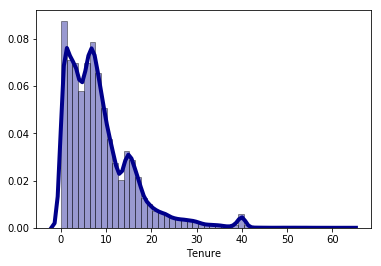

In [82]:
sns.distplot(data.Tenure,hist=True, kde=True,color ='darkblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})


## The points which are 3 standard deviation above and below the mean are outliers and we can fix the values of the outliers with a fixed value

In [83]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=3
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    rem=[]
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if z_score>3:
            outliers.append(y)
            rem.append(mean_1+(3*std_1))
        elif z_score<-3:
            outliers.append(y)
            rem.append(mean_1-(3*std_1))
        
            
            
        else:
            rem.append(y)
            
        
    return outliers,rem

In [84]:
print("The number of outlier in Data.Tenure feature",len(detect_outlier(data.Tenure)[0]))

The number of outlier in Data.Tenure feature 2466


## Applying log transformation to see if outliers can be handled effectively

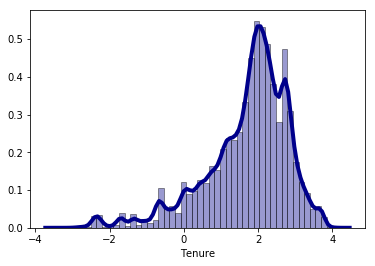

In [85]:
sns.distplot(np.log(data.Tenure),hist=True, kde=True,color ='darkblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})

In [86]:
print("The number of outlier in np.log(Data.Tenure) feature",len(detect_outlier(np.log(data.Tenure))[0]))

The number of outlier in np.log(Data.Tenure) feature 4859


## Since the outliers number is very high still after the log transformation so outlier cannot be remove from this variable 

# Solution:
# A. No need to remove the outliers as they might represent a pattern in the data
# B. Outliers should be replace with the fixed values which are 3 standard deviation above and below the mean 

In [87]:
data1['Tenure_tranform']=detect_outlier(data1.Tenure)[1]


# Detect outliers in Age Variable

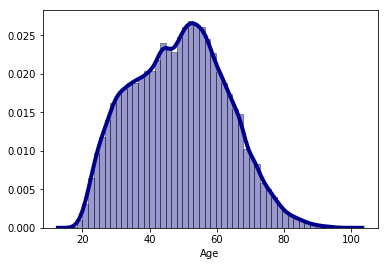

In [88]:
sns.distplot((data.Age),hist=True, kde=True,color ='darkblue',hist_kws={'edgecolor':'black'},kde_kws={'linewidth': 4})


## It looks normally distributed with less outliers so outliers in the variable can be ignored


{'boxes': [<matplotlib.patches.PathPatch at 0x7f2041c408d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f2041c40fd0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f2041c4a9e8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f2041c4a6a0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f2041c40b38>,
  <matplotlib.lines.Line2D at 0x7f2041c40c88>]}

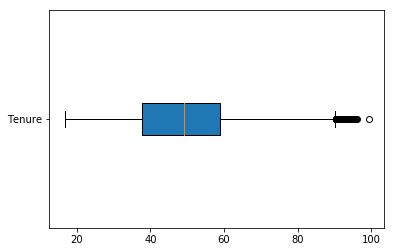

In [89]:
plt.boxplot(data.Age,patch_artist=True,labels=['Tenure'],vert=0)

In [90]:
data['Age'].describe()

count    128999.000000
mean         48.817070
std          14.037732
min          16.689938
25%          37.848049
50%          49.117043
75%          58.835045
max          99.348392
Name: Age, dtype: float64

## Feature engineering (Binning the categorical variables)
## Rated state of the policy represents 51 unique states instead of creating too many dummy variables we can create buckets with states have people where service call rate is higher are rank more.

In [91]:
data = data.join(pd.cut(data.groupby(
            "RTD_ST_CD")["Call_Flag"].mean().sort_values(), 4, labels=[
            "0","1","2","3"]), on="RTD_ST_CD", rsuffix="_ST")

data1 = data1.join(pd.cut(data1.groupby(
            "RTD_ST_CD")["Call_Flag"].mean().sort_values(), 4, labels=[
            "0","1","2","3"]), on="RTD_ST_CD", rsuffix="_ST")

## The age of the policy holder can be grouped into four categories:
## 16 years-29 years -Young
## 29-45 -Mature
## 45-60 -Middle age
## 60-100 -Old Age

In [92]:
data1['Age'].describe()


count    129808.000000
mean         48.845383
std          14.038682
min          16.689938
25%          37.880903
50%          49.152635
75%          58.858316
max          99.348392
Name: Age, dtype: float64

In [93]:
bins = [16,29,45,60,100]
labels=[0,1,2,3]
data1['binned_age'] = pd.cut(data1['Age'], bins,labels=labels)

# Drop the Date variable as it just seems from data description on that data was pulled out from the database

In [97]:
data.drop(["DATE_FOR", "RTD_ST_CD"], axis=1, inplace=True)
data1.drop(["DATE_FOR", "RTD_ST_CD"], axis=1, inplace=True)


# Create dummy variables for the categorical data

In [98]:
data_1 = pd.get_dummies(data['CustomerSegment'], prefix='CustomerSegment',drop_first=True).astype('bool')
data_2 = pd.get_dummies(data['MART_STATUS'], prefix='MART_STATUS').astype('bool')
data_3 = pd.get_dummies(data['GENDER'], prefix='GENDER',drop_first=True).astype('bool')
data_4 = pd.get_dummies(data['Call_Flag_ST'], prefix='RTD_ST_CD',drop_first=True).astype('bool')
#data_5 = pd.get_dummies(data['binned_Tenure'], prefix='Tenure',drop_first=True).astype('bool')
#data_6 = pd.get_dummies(data['binned_age'], prefix='Age',drop_first=True).astype('bool')

data.drop(['CustomerSegment','MART_STATUS','GENDER','Call_Flag_ST'], axis=1, inplace=True)
data = pd.concat([data, data_1,data_2,data_3,data_4], axis=1)

In [99]:
data_1 = pd.get_dummies(data1['CustomerSegment'], prefix='CustomerSegment',drop_first=True).astype('bool')
data_2 = pd.get_dummies(data1['MART_STATUS'], prefix='MART_STATUS').astype('bool')
data_3 = pd.get_dummies(data1['GENDER'], prefix='GENDER',drop_first=True).astype('bool')
data_4 = pd.get_dummies(data1['Call_Flag_ST'], prefix='RTD_ST_CD',drop_first=True).astype('bool')
#data_5 = pd.get_dummies(data1['binned_Tenure'], prefix='Tenure',drop_first=True).astype('bool')
data_6 = pd.get_dummies(data1['binned_age'], prefix='Age',drop_first=True).astype('bool')

data1.drop(['CustomerSegment','MART_STATUS','GENDER','Call_Flag_ST','binned_age','Age','Tenure'], axis=1, inplace=True)
data1 = pd.concat([data1, data_1,data_2,data_3,data_4,data_6], axis=1)

## Check Correlation with different modes of channel payment

## High Correlation
## CHANNEL3_6M=CHANNEL3_3M (0.96)
## CHANNEL4_6M=CHANNEL4_3M (0.88)
## CHANNEL5_6M=CHANNEL5_3M  (0.97)
## METHOD1_6M=METHOD1_3M   (0.94)
## PAYMENT_3M=PAYMENT_6M (0.85)

In [100]:
corr =data.iloc[:,[2,3,4,5,6,7,10,11,12,13,14]].corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,CHANNEL1_6M,CHANNEL2_6M,CHANNEL3_6M,CHANNEL4_6M,CHANNEL5_6M,METHOD1_6M,CHANNEL1_3M,CHANNEL2_3M,CHANNEL3_3M,CHANNEL4_3M,CHANNEL5_3M
CHANNEL1_6M,1,-0.087,-0.098,0.042,-0.075,0.36,0.9,-0.074,-0.09,0.061,-0.069
CHANNEL2_6M,-0.087,1,-0.19,0.043,-0.16,0.15,-0.079,0.95,-0.18,0.029,-0.15
CHANNEL3_6M,-0.098,-0.19,1,-0.12,-0.15,-0.29,-0.087,-0.18,0.96,-0.11,-0.14
CHANNEL4_6M,0.042,0.043,-0.12,1,-0.11,0.22,0.028,0.052,-0.12,0.88,-0.11
CHANNEL5_6M,-0.075,-0.16,-0.15,-0.11,1,-0.22,-0.066,-0.15,-0.14,-0.098,0.97
METHOD1_6M,0.36,0.15,-0.29,0.22,-0.22,1,0.3,0.15,-0.27,0.19,-0.21
CHANNEL1_3M,0.9,-0.079,-0.087,0.028,-0.066,0.3,1,-0.07,-0.081,0.037,-0.062
CHANNEL2_3M,-0.074,0.95,-0.18,0.052,-0.15,0.15,-0.07,1,-0.18,0.0059,-0.15
CHANNEL3_3M,-0.09,-0.18,0.96,-0.12,-0.14,-0.27,-0.081,-0.18,1,-0.11,-0.14
CHANNEL4_3M,0.061,0.029,-0.11,0.88,-0.098,0.19,0.037,0.0059,-0.11,1,-0.097


## Drop one of the correlated variables

In [101]:
print (data.EVENT1_30_FLAG.unique())
data1.drop(['CHANNEL1_6M','CHANNEL2_6M','CHANNEL3_6M','CHANNEL4_6M','CHANNEL5_6M',
           'METHOD1_6M','PAYMENTS_6M','EVENT1_30_FLAG'], axis=1, inplace=True)

data.drop(['EVENT1_30_FLAG'], axis=1, inplace=True)


data[['RECENT_PAYMENT','NOT_DI_3M','NOT_DI_6M','POLICYPURCHASECHANNEL','Call_Flag']] = data[
    ['RECENT_PAYMENT','NOT_DI_3M','NOT_DI_6M','POLICYPURCHASECHANNEL','Call_Flag']].astype('bool')


data1[['RECENT_PAYMENT','NOT_DI_3M','NOT_DI_6M','POLICYPURCHASECHANNEL','Call_Flag']] = data1[
    ['RECENT_PAYMENT','NOT_DI_3M','NOT_DI_6M','POLICYPURCHASECHANNEL','Call_Flag']].astype('bool')

[0]


# Machine Learning Model

In [103]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.utils import shuffle
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, RidgeClassifierCV, LassoCV
from sklearn.metrics import roc_auc_score, make_scorer, confusion_matrix, classification_report, f1_score,auc,roc_curve,precision_recall_curve
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from matplotlib.pylab import rcParams

from imblearn.under_sampling import (ClusterCentroids, RandomUnderSampler,
                                     NearMiss,
                                     InstanceHardnessThreshold,
                                     CondensedNearestNeighbour,
                                     EditedNearestNeighbours,
                                     RepeatedEditedNearestNeighbours,
                                     AllKNN,
                                     NeighbourhoodCleaningRule,
                                     OneSidedSelection,TomekLinks)




# Undersampling 

In [105]:
X=data.drop("Call_Flag", axis=1)
y=data["Call_Flag"]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0,stratify=y)


train=pd.concat([X_train,y_train],axis=1)
train['Call_Flag'].value_counts()
df_majority = train[train.Call_Flag==0]
df_minority = train[train.Call_Flag==1]
 
# Upsample minority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample without replacement
                                 n_samples=df_minority.shape[0],    # to match minority class
                                 random_state=10) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority, df_majority_downsampled])
df_upsampled=shuffle(df_upsampled)
X_train=df_upsampled.drop('Call_Flag',axis=1)
y_train=df_upsampled['Call_Flag']


score = make_scorer(roc_auc_score)

##Calculate Area under ROC Curve    
def auc_roc(clf, features, target):
    probs = clf.predict_proba(features)
    probs = probs[:, 1]
    auc_score = roc_auc_score(target,probs)
    return auc_score



# RANDOM FOREST (Hyper Parameter Tuning :Grid Search)
# CrossValidation

In [108]:
parameters = {'n_estimators':(30,50,100),'max_depth':(8,16,32,64,100),'criterion':('gini','entropy'),'min_samples_split':(2,3,4),'min_samples_leaf':(1,2,3)}

R_forest = RandomForestClassifier(class_weight='balanced',random_state=10)
grid = GridSearchCV(R_forest,param_grid=parameters, scoring=score, verbose=1, n_jobs=-1, cv=4)
grid = grid.fit(X_train, y_train)
R_forest = grid.best_estimator_
print (R_forest.get_params())  




Fitting 4 folds for each of 270 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:   32.9s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   50.0s finished


{'max_features': 'auto', 'class_weight': 'balanced', 'criterion': 'gini', 'verbose': 0, 'min_samples_split': 2, 'min_impurity_split': None, 'random_state': 10, 'oob_score': False, 'warm_start': False, 'n_jobs': None, 'max_depth': 32, 'bootstrap': True, 'min_weight_fraction_leaf': 0.0, 'min_samples_leaf': 3, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'n_estimators': 50}


# AUC (Area under Curve) for ROC 

In [109]:
print ("Tuned model has a training AUC score under ROC curve {:.2f}.".format(auc_roc(R_forest, X_train, y_train)))
print ("Tuned model has a testing AUC score under ROC curve {:.2f}.".format(auc_roc(R_forest, X_test, y_test)))

Tuned model has a training AUC score under ROC curve 0.96.
Tuned model has a testing AUC score under ROC curve 0.86.


# Precision/Recall-This metric is essential for Unbalanced dataset

In [110]:
print (classification_report(y_test, R_forest.predict(X_test)))


              precision    recall  f1-score   support

       False       0.99      0.75      0.85     31078
        True       0.11      0.81      0.19      1172

    accuracy                           0.75     32250
   macro avg       0.55      0.78      0.52     32250
weighted avg       0.96      0.75      0.83     32250



## Confusion Matrix

In [111]:
print (confusion_matrix(y_test, R_forest.predict(X_test)))


[[23368  7710]
 [  222   950]]


## ROC Curve (AUC=0.86) -Higher the value for AUC better is the model

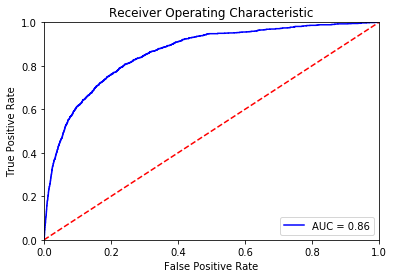

In [112]:
probs = R_forest.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Feature Importance (The number of payment made thru channel 4,number of login,tenure of the policy holder are extremely important)

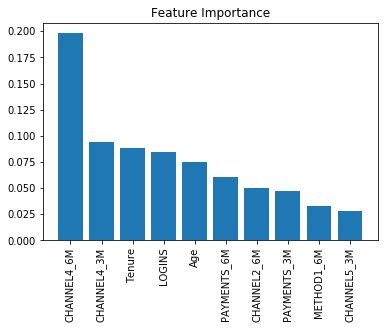

In [113]:
importances = R_forest.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1][0:10]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices][0:10]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(10), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(10), names, rotation=90)

# Show plot
plt.show()

## Gradient Boosting

In [115]:
parameters = {'loss':('deviance','exponential'),
              'learning_rate':(0.01,0.5,0.1,1.0),
             'n_estimators':(100,150,200),'max_depth':(8,16,32,64,100)}

Gradient_Boosting=GradientBoostingClassifier(random_state=10)
grid_obj = GridSearchCV(Gradient_Boosting, param_grid=parameters, scoring=score, verbose=1, n_jobs=-1, cv=4)
grid_obj = grid_obj.fit(X_train, y_train)
Gradient_Boosting= grid_obj.best_estimator_
print (Gradient_Boosting.get_params())




Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   46.9s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  9.6min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 10.0min finished


{'presort': 'auto', 'max_features': None, 'learning_rate': 0.01, 'criterion': 'friedman_mse', 'verbose': 0, 'min_samples_split': 2, 'min_impurity_split': None, 'n_iter_no_change': None, 'random_state': 10, 'loss': 'exponential', 'init': None, 'subsample': 1.0, 'validation_fraction': 0.1, 'max_depth': 8, 'warm_start': False, 'tol': 0.0001, 'min_weight_fraction_leaf': 0.0, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'n_estimators': 200}


In [116]:

print ("Tuned model has a training AUC score under ROC curve {:.4f}.".format(auc_roc(Gradient_Boosting, X_train, y_train)))
print ("Tuned model has a testing AUC score under ROC curve {:.4f}.".format(auc_roc(Gradient_Boosting, X_test, y_test)))

Tuned model has a training AUC score under ROC curve 0.9467.
Tuned model has a testing AUC score under ROC curve 0.8565.


## Confusion Matrix

In [117]:
print (confusion_matrix(y_test, Gradient_Boosting.predict(X_test)))


[[23590  7488]
 [  248   924]]


## Precision/Recall

In [118]:
print (classification_report(y_test, Gradient_Boosting.predict(X_test)))


              precision    recall  f1-score   support

       False       0.99      0.76      0.86     31078
        True       0.11      0.79      0.19      1172

    accuracy                           0.76     32250
   macro avg       0.55      0.77      0.53     32250
weighted avg       0.96      0.76      0.83     32250



## ROC Curve

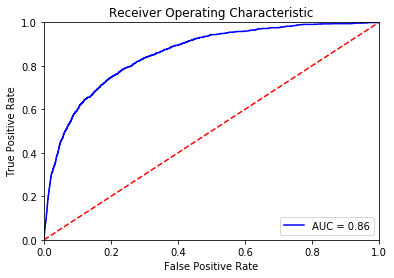

In [119]:
probs = Gradient_Boosting.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Feature Importance

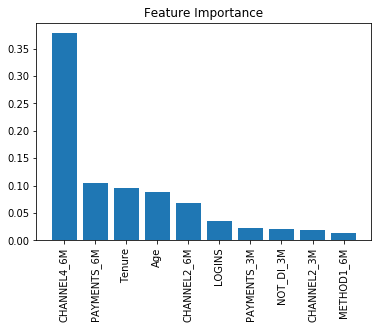

In [120]:
importances = Gradient_Boosting.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1][0:10]

# Rearrange feature names so they match the sorted feature importances
names = [X_train.columns[i] for i in indices][0:10]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(10), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(10), names, rotation=90)

# Show plot
plt.show()

# Support Vector Classification

In [121]:
parameters = {'C':(0.05,)
              }

SVM = SVC(class_weight='balanced',probability=True,random_state=10,kernel='linear')
grid_obj = GridSearchCV(SVM, param_grid=parameters, scoring=score, verbose=1, n_jobs=-1, cv=4)
grid_obj = grid_obj.fit(X_train, y_train)
SVM = grid_obj.best_estimator_
print (SVM.get_params())


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:    8.9s finished


{'probability': True, 'decision_function_shape': 'ovr', 'degree': 3, 'class_weight': 'balanced', 'shrinking': True, 'verbose': False, 'kernel': 'linear', 'random_state': 10, 'coef0': 0.0, 'cache_size': 200, 'gamma': 'auto_deprecated', 'max_iter': -1, 'tol': 0.001, 'C': 0.05}


In [122]:
print ("Tuned model has a training AUC score under ROC curve {:.4f}.".format(auc_roc(SVM, X_train, y_train)))
print ("Tuned model has a testing AUC score under ROC curve {:.4f}.".format(auc_roc(SVM, X_test, y_test)))

Tuned model has a training AUC score under ROC curve 0.8566.
Tuned model has a testing AUC score under ROC curve 0.8521.


## Confusion Matrix

In [123]:
print (confusion_matrix(y_test, SVM.predict(X_test)))


[[20742 10336]
 [  169  1003]]


## Precision/Recall

In [124]:
print (classification_report(y_test, SVM.predict(X_test)))


              precision    recall  f1-score   support

       False       0.99      0.67      0.80     31078
        True       0.09      0.86      0.16      1172

    accuracy                           0.67     32250
   macro avg       0.54      0.76      0.48     32250
weighted avg       0.96      0.67      0.77     32250



## ROC curve (AUC:0.85)

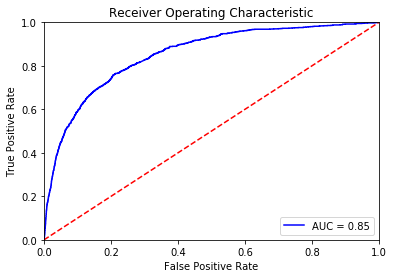

In [125]:
probs = SVM.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## Undersampling on transformed Dataset

In [ ]:
X=data1.drop("Call_Flag", axis=1)
y=data1["Call_Flag"]


XX_train, XX_test, yy_train, yy_test = train_test_split(X, y,test_size=0.25,random_state=0,stratify=y)


train=pd.concat([XX_train,yy_train],axis=1)

df_majority = train[train.Call_Flag==0]
df_minority = train[train.Call_Flag==1]
 
# downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample without replacement
                                 n_samples=df_minority.shape[0],    # to match minority class
                                 random_state=10) # reproducible results


# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority, df_majority_downsampled])
df_upsampled=shuffle(df_upsampled)
XX_train=df_upsampled.drop('Call_Flag',axis=1)
yy_train=df_upsampled['Call_Flag']



score = make_scorer(roc_auc_score)

    
def auc_roc(clf, features, target):
    probs = clf.predict_proba(features)
    probs = probs[:, 1]
    auc_score = roc_auc_score(target,probs)
    return auc_score


## Random Forest

In [126]:
parameters = {'n_estimators':(30,50,100),'max_depth':(8,16,32,64,100),'criterion':('gini','entropy'),'min_samples_split':(2,3,4),'min_samples_leaf':(1,2,3)}

RR_forest = RandomForestClassifier(class_weight='balanced',random_state=10)
grid = GridSearchCV(RR_forest,param_grid=parameters, scoring=score, verbose=1, n_jobs=-1, cv=4)
grid = grid.fit(XX_train, yy_train)
RR_forest = grid.best_estimator_
print (RR_forest.get_params())  



Fitting 4 folds for each of 270 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 514 tasks      | elapsed:   17.0s
[Parallel(n_jobs=-1)]: Done 864 tasks      | elapsed:   30.5s
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:   40.6s finished


{'max_features': 'auto', 'class_weight': 'balanced', 'criterion': 'gini', 'verbose': 0, 'min_samples_split': 3, 'min_impurity_split': None, 'random_state': 10, 'oob_score': False, 'warm_start': False, 'n_jobs': None, 'max_depth': 8, 'bootstrap': True, 'min_weight_fraction_leaf': 0.0, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'n_estimators': 50}


In [127]:
print ("Tuned model has a training AUC score under ROC curve {:.2f}.".format(auc_roc(RR_forest, XX_train, yy_train)))
print ("Tuned model has a testing AUC score under ROC curve {:.2f}.".format(auc_roc(RR_forest, XX_test, yy_test)))

Tuned model has a training AUC score under ROC curve 0.88.
Tuned model has a testing AUC score under ROC curve 0.85.


## Precision/Recall

In [128]:
print (classification_report(yy_test, RR_forest.predict(XX_test)))


              precision    recall  f1-score   support

       False       0.99      0.74      0.85     31271
        True       0.10      0.79      0.18      1181

    accuracy                           0.74     32452
   macro avg       0.55      0.76      0.51     32452
weighted avg       0.96      0.74      0.82     32452



## Confusion Matrix

In [129]:
print (confusion_matrix(yy_test, RR_forest.predict(XX_test)))


[[23176  8095]
 [  253   928]]


## ROC Curve

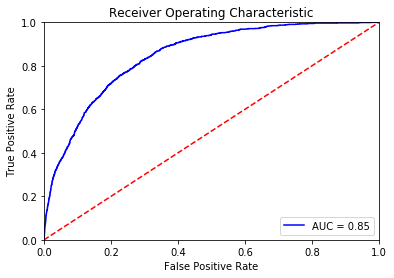

In [130]:
probs = RR_forest.predict_proba(XX_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(yy_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

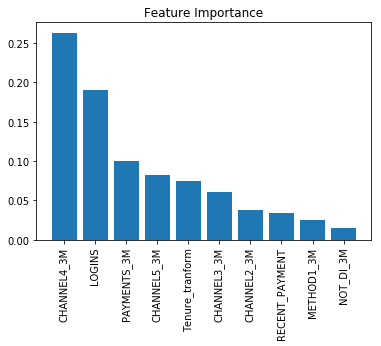

In [131]:
importances = RR_forest.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1][0:10]

# Rearrange feature names so they match the sorted feature importances
names = [XX_train.columns[i] for i in indices][0:10]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(10), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(10), names, rotation=90)

# Show plot
plt.show()

# Gradient Boosting

In [132]:
parameters = {'loss':('deviance','exponential'),
              'learning_rate':(0.01,0.5,0.1,1.0),
             'n_estimators':(100,150,200),'max_depth':(8,16,32,64,100)}

GGradient_Boosting=GradientBoostingClassifier(random_state=10)
grid_obj = GridSearchCV(GGradient_Boosting, param_grid=parameters, scoring=score, verbose=1, n_jobs=-1, cv=4)
grid_obj = grid_obj.fit(XX_train, yy_train)
GGradient_Boosting= grid_obj.best_estimator_
print (GGradient_Boosting.get_params())



Fitting 4 folds for each of 120 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  9.8min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed: 10.6min finished


{'presort': 'auto', 'max_features': None, 'learning_rate': 0.01, 'criterion': 'friedman_mse', 'verbose': 0, 'min_samples_split': 2, 'min_impurity_split': None, 'n_iter_no_change': None, 'random_state': 10, 'loss': 'exponential', 'init': None, 'subsample': 1.0, 'validation_fraction': 0.1, 'max_depth': 8, 'warm_start': False, 'tol': 0.0001, 'min_weight_fraction_leaf': 0.0, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'n_estimators': 200}


In [133]:
print ("Tuned model has a training AUC score under ROC curve {:.2f}.".format(auc_roc(GGradient_Boosting, XX_train, yy_train)))
print ("Tuned model has a testing AUC score under ROC curve {:.2f}.".format(auc_roc(GGradient_Boosting, XX_test, yy_test)))

Tuned model has a training AUC score under ROC curve 0.92.
Tuned model has a testing AUC score under ROC curve 0.84.


In [134]:
print (classification_report(yy_test, GGradient_Boosting.predict(XX_test)))


              precision    recall  f1-score   support

       False       0.99      0.75      0.85     31271
        True       0.10      0.76      0.18      1181

    accuracy                           0.75     32452
   macro avg       0.55      0.76      0.52     32452
weighted avg       0.96      0.75      0.83     32452



In [135]:
print (confusion_matrix(yy_test,GGradient_Boosting.predict(XX_test)))


[[23480  7791]
 [  278   903]]


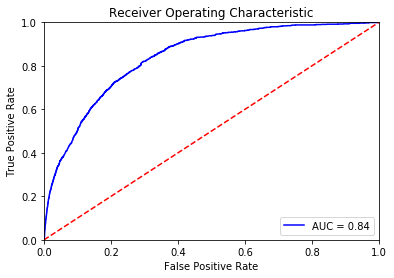

In [136]:
probs = GGradient_Boosting.predict_proba(XX_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(yy_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

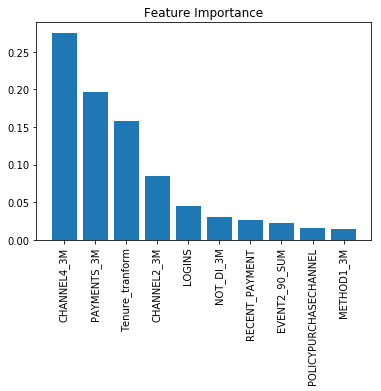

In [137]:
importances = GGradient_Boosting.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1][0:10]

# Rearrange feature names so they match the sorted feature importances
names = [XX_train.columns[i] for i in indices][0:10]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(10), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(10), names, rotation=90)

# Show plot
plt.show()



## Support Vector Classification

In [138]:
parameters = {'C':(0.5,)
              }

SSVM = SVC(class_weight='balanced',probability=True,random_state=10,kernel='linear')
grid_obj = GridSearchCV(SSVM, param_grid=parameters, scoring=score, verbose=1, n_jobs=-1, cv=4)
grid_obj = grid_obj.fit(XX_train, yy_train)
SSVM = grid_obj.best_estimator_
print (SSVM.get_params())


Fitting 4 folds for each of 1 candidates, totalling 4 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:   11.5s finished


{'probability': True, 'decision_function_shape': 'ovr', 'degree': 3, 'class_weight': 'balanced', 'shrinking': True, 'verbose': False, 'kernel': 'linear', 'random_state': 10, 'coef0': 0.0, 'cache_size': 200, 'gamma': 'auto_deprecated', 'max_iter': -1, 'tol': 0.001, 'C': 0.5}


In [139]:
print ("Tuned model has a training AUC score under ROC curve {:.4f}.".format(auc_roc(SSVM, XX_train, yy_train)))
print ("Tuned model has a testing AUC score under ROC curve {:.4f}.".format(auc_roc(SSVM, XX_test, yy_test)))

Tuned model has a training AUC score under ROC curve 0.8406.
Tuned model has a testing AUC score under ROC curve 0.8342.


In [140]:
print (confusion_matrix(yy_test, SSVM.predict(XX_test)))


[[19936 11335]
 [  161  1020]]


In [141]:
print (classification_report(yy_test,SSVM.predict(XX_test)))


              precision    recall  f1-score   support

       False       0.99      0.64      0.78     31271
        True       0.08      0.86      0.15      1181

    accuracy                           0.65     32452
   macro avg       0.54      0.75      0.46     32452
weighted avg       0.96      0.65      0.75     32452



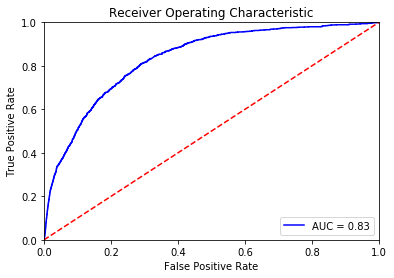

In [142]:
probs = SSVM.predict_proba(XX_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(yy_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

#  XGboost Gradient Boosting

In [143]:
parameters = {'n_estimators':(30,50,100,200),'max_depth':(3,8,16,32,64),'learning_rate':(0.05,0.1,0.3),'min_child_weight':range(1,6,2),'gamma':[i/10.0 for i in range(0,5)] }

XGB = XGBClassifier(random_state=10)
grid =GridSearchCV(XGB,param_grid=parameters, scoring=score, verbose=1, n_jobs=4, cv=4)
grid =grid.fit(X_train, y_train)
XGB = grid.best_estimator_
print (XGB.get_params())  


Fitting 4 folds for each of 900 candidates, totalling 3600 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    5.9s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.6min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  4.1min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:  7.1min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 11.6min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 16.6min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 23.1min
[Parallel(n_jobs=4)]: Done 3192 tasks      | elapsed: 30.2min
[Parallel(n_jobs=4)]: Done 3600 out of 3600 | elapsed: 34.7min finished


{'reg_lambda': 1, 'colsample_bytree': 1, 'missing': None, 'colsample_bylevel': 1, 'subsample': 1, 'seed': None, 'reg_alpha': 0, 'max_depth': 3, 'scale_pos_weight': 1, 'base_score': 0.5, 'silent': None, 'n_estimators': 200, 'learning_rate': 0.1, 'n_jobs': 1, 'nthread': None, 'verbosity': 1, 'random_state': 10, 'min_child_weight': 3, 'max_delta_step': 0, 'gamma': 0.1, 'booster': 'gbtree', 'colsample_bynode': 1, 'objective': 'binary:logistic'}


In [144]:
print (confusion_matrix(y_test, XGB.predict(X_test)))


[[23821  7257]
 [  241   931]]


In [145]:

print (classification_report(y_test, XGB.predict(X_test)))


              precision    recall  f1-score   support

       False       0.99      0.77      0.86     31078
        True       0.11      0.79      0.20      1172

    accuracy                           0.77     32250
   macro avg       0.55      0.78      0.53     32250
weighted avg       0.96      0.77      0.84     32250



In [146]:

print ("Tuned model has a training AUC score under ROC curve {:.4f}.".format(auc_roc(XGB, X_train, y_train)))
print ("Tuned model has a testing AUC score under ROC curve {:.4f}.".format(auc_roc(XGB, X_test, y_test)))

Tuned model has a training AUC score under ROC curve 0.8975.
Tuned model has a testing AUC score under ROC curve 0.8645.


# Undersampling (TomeKlinks Sampling)

In [147]:
X=data.drop("Call_Flag", axis=1)
y=data["Call_Flag"]


X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0,stratify=y)


CC=TomekLinks(random_state=10,n_jobs=-1)
X_train, y_train = CC.fit_resample(X_train,y_train)

#  Random Forest

In [148]:
parameters = {'n_estimators':(30,50,100),'max_depth':(8,16,32,64,100),'criterion':('gini','entropy'),'min_samples_split':(2,3,4),'min_samples_leaf':(1,2,3)}

R_forest = RandomForestClassifier(class_weight='balanced',random_state=10)
grid = GridSearchCV(R_forest,param_grid=parameters, scoring=score, verbose=1, n_jobs=-1, cv=4)
grid = grid.fit(X_train, y_train)
R_forest = grid.best_estimator_
print (R_forest.get_params())  


Fitting 4 folds for each of 270 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 10.3min finished


{'max_features': 'auto', 'class_weight': 'balanced', 'criterion': 'entropy', 'verbose': 0, 'min_samples_split': 4, 'min_impurity_split': None, 'random_state': 10, 'oob_score': False, 'warm_start': False, 'n_jobs': None, 'max_depth': 8, 'bootstrap': True, 'min_weight_fraction_leaf': 0.0, 'min_samples_leaf': 1, 'min_impurity_decrease': 0.0, 'max_leaf_nodes': None, 'n_estimators': 100}


In [149]:
print ("Tuned model has a training AUC score under ROC curve {:.2f}.".format(auc_roc(R_forest, X_train, y_train)))
print ("Tuned model has a testing AUC score under ROC curve {:.2f}.".format(auc_roc(R_forest, X_test, y_test)))

Tuned model has a training AUC score under ROC curve 0.89.
Tuned model has a testing AUC score under ROC curve 0.86.


In [150]:
print (classification_report(y_test, R_forest.predict(X_test)))


              precision    recall  f1-score   support

       False       0.99      0.78      0.87     31078
        True       0.12      0.77      0.20      1172

    accuracy                           0.78     32250
   macro avg       0.55      0.78      0.54     32250
weighted avg       0.96      0.78      0.85     32250



In [151]:
print (confusion_matrix(y_test, R_forest.predict(X_test)))


[[24257  6821]
 [  266   906]]


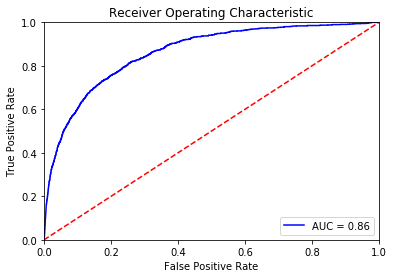

In [152]:
probs = R_forest.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

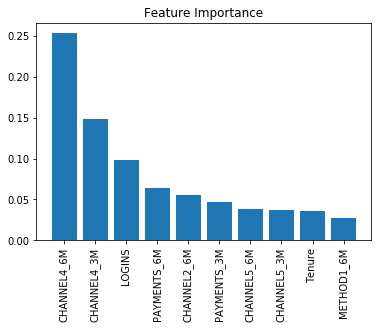

In [153]:
importances = R_forest.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1][0:10]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices][0:10]

# Create plot
plt.figure()

# Create plot title
plt.title("Feature Importance")

# Add bars
plt.bar(range(10), importances[indices])

# Add feature names as x-axis labels
plt.xticks(range(10), names, rotation=90)

# Show plot
plt.show()